# 2021 Contest _ CJ 미래기술 챌린지

## AI/BIG DATA & SYSTEM

## TEAM : DAE-JI
### MEMBER : 
- 강민기(SHERLOCK), 김인정(GENIE), 전민주(ANGEL), 채예진(HERO)

### 주제 : FC 별 입고 시뮬레이션
### 주제 : 지역별 수요 예측 기반 입고 계획 수립 모델
dataset :
1. 이커머스 FC 주문 데이터 (월 별 데이터)
2. 택배 배송 데이터

이제 1. 이커머스 FC 주문 데이터를 가지고 머신러닝을 진행해 볼 것이다.
계속 무엇을 예측해야 하는지를 집착했는데, 결국에는

## <어느 시점에 얼만큼 어떤 재고를 입고해야하고 어느 기간동안 이를 유지해야할지>

이다!    

그래서, 가장 먼저 무엇을 해보아야 하는가? 고민을 했을 때
지역별, 시간 흐름 별 재고 수요량 (언제 어떤 재고를 이 위치에서 얼만큼 수요하는가) 을 파악해봐야 한다고 생각했다.=> 그리고 이건 간선 경로 확인해보는 것과 동일선 상에 놓여져있다고 생각된다.

그럼 어떤 데이터들이 우리가 예측해야할 요소들의 변인이 되는지를 확인해보아야 한다.



## 지역별 수요 예측 기반 입고 계획 수립 모델
을 만드는 것이다.

- 그래서 우리는 입고 주기를 어떻게 세워야할지 고민을 했고 주 단위로 일단 만들어보기로 했다.
- 주 단위로 어느 지역에서 어떤 물품을 얼만큼 원하는지! 그리고 이 물품은 어떤 FC에서 출발할지! 
- 이런식으로 예측이 된다면 각 FC별로 안전 재고와 사이클 재고를 어떻게 보유하고 있어야할지도 예측이 될 것이다. 
- 안전재고와 사이클 재고의 보유 기간을 결정하는 것 또한 예측을 해야한다. 
- 주문비용이랑 보관 비용을 얼마에 한 번씩 , 주기를 계산하는 식이 있음. 하지만 주문 비용, 보관비용에 관한 데이터 부재.
- 품목을 기준으로 주문 금액 -> 주문 비용 아님!
- 기준을 일주일로 잡아서, 몇 주에 한 번씩 입고해야하는 지 계획을 잡아야함. 사이클 인벤토리랑 세이프티 인벤토리의 주기도  주문 주기와 같음.

그래서 결국에 어떤 목차가 되어야 맞는지는 잘 모르겠다! 이지만,
지금 진행할 content0 의 목차를 고민해보자면

### Content 0 : 기간 별, 지역별 상품 수요량 확인
#### 1. fc 월별 데이터 합치기(수요의 흐름을 보고싶은 것이기 때문에)
#### 2. fc 월별 데이터 중 지역별 재고 수요와 1%정도의 관련도 없어보이는 column 삭제하기
#### 3. 결손 데이터 처리하기
#### 4. dtype 변환하기

**칼럼 코드를 한국어로 잘 바꿔서 주석만 달아놓기**
### Content1 : 시각화하기
#### 1. 지역별 상품 수요량 파악하기
#### 2. FC 별 상품 수요량 파악하기
#### 3. 월 별 데이터 정리하기

### Content2 : 주 단위로 입고 계획 수립의 전 단계 진행!


### Content2 : 다른 데이터 수집하기
분명 어느 정도 데이터 분석을 했고 주제 파악을 했다면 필요한 데이터가 어떤 것인지 확인될 것임.

### ContentN : Multi variable Regression 수행하기

In [1]:
import sys
import numpy as np
import pandas as pd

### 1. csv 파일 df로 불러오기
하나의 파일에 대해 df 로 불러온 뒤 어떤 형태로 구성된 데이터인지를 확인한다.

In [2]:
fc3_df = pd.read_csv('data_2021cj\data_ecommerceFC\FC_3.csv',encoding ='utf-8')

C:\anan\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
fc3_df.head(3)

,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,...,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,KX007,2021030365922551,KX007210303370934,7,20210303,35510,90001302,22400.0,2,134265392,...,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구
1,KX007,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1,4610261043_2,...,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,KX007,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1,4936599538_1,...,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시


In [4]:
fc3_df.shape
#32개의 요소에 대한 309352-1 개의 정보

(309352, 32)

아래의 정보에 대해 조금의 설명을 달아보자면, Dtype 의 object는 문자열이라 생각하면 되고, 지금 SHPR_ADDR_2를 제외한 모든 COLUMN들이 30만개 이상의 NON-NULL임을 확인할 수 있다.


In [5]:
fc3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309352 entries, 0 to 309351
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CORP_ID             309352 non-null  object 
 1   REF_ORD_NO          309352 non-null  object 
 2   BKG_NO              309349 non-null  object 
 3   BKG_TYP             309352 non-null  int64  
 4   BKG_DATE            309352 non-null  int64  
 5   BKG_TIME            309352 non-null  int64  
 6   SHPR_CD             309352 non-null  int64  
 7   INV_AMT             305414 non-null  float64
 8   ITEM_SEQ            309352 non-null  int64  
 9   ITEM_CD             309352 non-null  object 
 10  BRAND_NM            301758 non-null  object 
 11  ITEM_QTY            309352 non-null  int64  
 12  ITEM_AMT            306284 non-null  float64
 13  IF_YN               309352 non-null  object 
 14  ORDER_CRT_DATETIME  301758 non-null  float64
 15  DLV_DV              309220 non-nul

- count : non-null인 데이터 건수
- mean : 전체 데이터의 평균값
- std : 표준편차
- min : 최솟값

In [6]:
fc3_df.describe()

,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_QTY,ITEM_AMT,ORDER_CRT_DATETIME,DLV_DV,INS_DATE,INS_TIME,POST_ZONE
count,309352.00000,3.093520e+05,309352.000000,3.093520e+05,3.054140e+05,309352.000000,309352.000000,3.062840e+05,3.017580e+05,309220.0,3.093520e+05,309352.000000,309220.000000
mean,7.00043,2.021032e+07,95035.831852,9.000141e+07,5.675440e+04,1.403576,2.030234,4.000405e+04,2.021032e+13,1.0,2.021032e+07,145352.291160,25.587055
std,0.02073,9.171140e+00,61630.865074,1.016592e+02,6.375390e+04,1.015545,294.231886,5.156776e+04,9.513625e+06,0.0,1.187998e+01,60230.814456,18.232241
min,7.00000,2.021030e+07,0.000000,9.000130e+07,0.000000e+00,1.000000,1.000000,0.000000e+00,2.021022e+13,1.0,2.021023e+07,4.000000,1.000000
25%,7.00000,2.021031e+07,42145.000000,9.000130e+07,1.990000e+04,1.000000,1.000000,1.335000e+04,2.021031e+13,1.0,2.021031e+07,104242.000000,10.000000
50%,7.00000,2.021032e+07,100004.000000,9.000134e+07,3.780000e+04,1.000000,1.000000,2.090000e+04,2.021032e+13,1.0,2.021032e+07,144244.000000,21.000000
75%,7.00000,2.021032e+07,133351.000000,9.000154e+07,7.160000e+04,1.000000,1.000000,4.380000e+04,2.021032e+13,1.0,2.021032e+07,201428.000000,42.000000
max,8.00000,2.021033e+07,235959.000000,9.000158e+07,4.760000e+06,35.000000,163200.000000,4.760000e+06,2.021033e+13,1.0,2.021041e+07,235637.000000,99.000000


### 2. 여러 fc 데이터 파일 하나로 합치기

In [7]:
fc4_df = pd.read_csv('data_2021cj\data_ecommerceFC\FC_4.csv')
fc5_df = pd.read_csv('data_2021cj\data_ecommerceFC\FC_5.csv')
fc6_df = pd.read_csv('data_2021cj\data_ecommerceFC\FC_6.csv')


C:\anan\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\anan\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
allFC_df = pd.concat([fc3_df,fc4_df, fc5_df, fc6_df])

In [9]:
allFC_df.head(10)

,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,...,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,KX007,2021030365922551,KX007210303370934,7,20210303,35510,90001302,22400.0,2,134265392,...,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구
1,KX007,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1,4610261043_2,...,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,KX007,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1,4936599538_1,...,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시
3,KX007,2021030365928921,KX007210303371205,7,20210303,35608,90001542,69800.0,1,3858391637_1,...,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구
4,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,1,4631307460,...,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
5,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,2,2475138283,...,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
6,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,3,4571859898-1,...,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
7,KX007,2021030365933981,KX007210303370935,7,20210303,35538,90001302,14900.0,1,603215395_1,...,1p,iNEXBatch,20210303,131425,47.0,N,세종특별자치시,NaN,부산광역시,연제구
8,KX007,2021030365934611,KX007210303370936,7,20210303,35732,90001302,19800.0,1,273205138_4,...,1,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
9,KX007,2021030365939621,KX007210303370968,7,20210303,35557,90001341,37900.0,1,5161458796,...,2,iNEXBatch,20210303,131426,4.0,N,경기도,광주시,서울특별시,성동구


In [10]:
allFC_df.shape

(1786374, 32)

In [11]:
allFC_df.describe()

,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_QTY,ITEM_AMT,ORDER_CRT_DATETIME,DLV_DV,INS_DATE,INS_TIME,POST_ZONE
count,1.786374e+06,1.786374e+06,1.786374e+06,1.786374e+06,1.758363e+06,1.786374e+06,1.786374e+06,1.767644e+06,1.744413e+06,1785331.0,1.786374e+06,1.786374e+06,1.785331e+06
mean,7.000586e+00,2.021050e+07,9.722577e+04,9.000148e+07,7.351862e+04,1.380549e+00,1.780672e+00,5.395772e+04,2.021050e+13,1.0,2.021050e+07,1.422477e+05,2.578878e+01
std,2.420249e-02,1.113475e+02,6.375165e+04,1.423993e+02,1.051609e+05,1.294329e+00,1.306268e+02,8.097853e+04,1.113782e+08,0.0,1.113587e+02,6.171412e+04,1.830104e+01
min,7.000000e+00,2.021030e+07,0.000000e+00,9.000130e+07,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.021022e+13,1.0,2.021023e+07,4.000000e+00,1.000000e+00
25%,7.000000e+00,2.021042e+07,4.203000e+04,9.000130e+07,2.180000e+04,1.000000e+00,1.000000e+00,1.580000e+04,2.021042e+13,1.0,2.021042e+07,1.035280e+05,1.000000e+01
50%,7.000000e+00,2.021052e+07,1.000565e+05,9.000152e+07,3.990000e+04,1.000000e+00,1.000000e+00,2.480000e+04,2.021052e+13,1.0,2.021052e+07,1.428410e+05,2.100000e+01
75%,7.000000e+00,2.021061e+07,1.358140e+05,9.000158e+07,8.680000e+04,1.000000e+00,1.000000e+00,5.960000e+04,2.021061e+13,1.0,2.021061e+07,1.949250e+05,4.200000e+01
max,8.000000e+00,2.021063e+07,2.359590e+05,9.000184e+07,7.968000e+06,1.160000e+02,1.632000e+05,7.968000e+06,2.021063e+13,1.0,2.021073e+07,2.356380e+05,9.900000e+01


In [12]:
allFC_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1786374 entries, 0 to 676911
Data columns (total 32 columns):
 #   Column              Dtype  
---  ------              -----  
 0   CORP_ID             object 
 1   REF_ORD_NO          object 
 2   BKG_NO              object 
 3   BKG_TYP             int64  
 4   BKG_DATE            int64  
 5   BKG_TIME            int64  
 6   SHPR_CD             int64  
 7   INV_AMT             float64
 8   ITEM_SEQ            int64  
 9   ITEM_CD             object 
 10  BRAND_NM            object 
 11  ITEM_QTY            int64  
 12  ITEM_AMT            float64
 13  IF_YN               object 
 14  ORDER_CRT_DATETIME  float64
 15  DLV_DV              float64
 16  REF_ITEM_SEQ        object 
 17  ORDER_IDX           object 
 18  ORDER_YN            object 
 19  DLVPREARRBRANCD     object 
 20  DLVPREARREMPNICKNM  object 
 21  DLVCLSFCD           object 
 22  DLVSUBCLSFCD        object 
 23  INS_ID              object 
 24  INS_DATE            int64

In [13]:
#concatenate 한 df 를 csv 파일로 만들기
allFC_df.to_csv("allFC_df.csv")

### 3. 다음은 굳이 코드로 표시되어 있는 정보들을 처리하기 쉽게 만들어본다.   
3-1) CORP_ID 가 곤지암 : KX007, 군포 : GP001 이런식으로 되어 있는데 곤지암을 0, 군포를 1로 바꾼다.

In [14]:
allFC_df.loc[(allFC_df['CORP_ID']=='KX007'),'CORP_ID']='0'
allFC_df.loc[(allFC_df['CORP_ID']=='GP001'),'CORP_ID']='1'

In [15]:
allFC_df.head(5)

,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,...,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,0,2021030365922551,KX007210303370934,7,20210303,35510,90001302,22400.0,2,134265392,...,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구
1,0,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1,4610261043_2,...,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,0,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1,4936599538_1,...,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시
3,0,2021030365928921,KX007210303371205,7,20210303,35608,90001542,69800.0,1,3858391637_1,...,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구
4,0,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,1,4631307460,...,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시


In [16]:
allFC_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1786374 entries, 0 to 676911
Data columns (total 32 columns):
 #   Column              Dtype  
---  ------              -----  
 0   CORP_ID             object 
 1   REF_ORD_NO          object 
 2   BKG_NO              object 
 3   BKG_TYP             int64  
 4   BKG_DATE            int64  
 5   BKG_TIME            int64  
 6   SHPR_CD             int64  
 7   INV_AMT             float64
 8   ITEM_SEQ            int64  
 9   ITEM_CD             object 
 10  BRAND_NM            object 
 11  ITEM_QTY            int64  
 12  ITEM_AMT            float64
 13  IF_YN               object 
 14  ORDER_CRT_DATETIME  float64
 15  DLV_DV              float64
 16  REF_ITEM_SEQ        object 
 17  ORDER_IDX           object 
 18  ORDER_YN            object 
 19  DLVPREARRBRANCD     object 
 20  DLVPREARREMPNICKNM  object 
 21  DLVCLSFCD           object 
 22  DLVSUBCLSFCD        object 
 23  INS_ID              object 
 24  INS_DATE            int64

크힉 순간 저 조건에 맞는 행들의 모든 열 값을 0으로 바꾸게 해버려 다 날라가는 상태가 발생했었다 ,, ㅎ 그래서 처음부터 다시 돌렸다,,

3-2) REF_ORD_NO 는 고객 주문번호, 해당 테이블 key 값, 네이버 채번,, 인데 음 BKG_DATE(주문 날짜) column에 들어가있는 값 + ,,65922551같은 숫자들은 모르겠는데,, 일단 굳이 앞의 주문날짜를 살려 놓을 필요는 없으니깐 삭제해버리고 뒷 부분의 숫자들은 어떤 값들인진 모르겠지만 해석을 못해먹겠고 코드,,짜기 귀찮으니 삭제해버린다.

In [17]:
allFC_df.drop(['REF_ORD_NO'],axis=1, inplace=True)#원본 데이터에서 날린거임!

3-3) BKG_NO는 대한통운 주문번호 (예약번호)이고 솔직히 다 필요없다고 생각해서 아예 column 전체를 날렸다.

In [18]:
allFC_df.drop(['BKG_NO'],axis=1, inplace=True) 
allFC_df.drop(['REF_ITEM_SEQ'], axis=1, inplace = True)

In [19]:
allFC_df

,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,BRAND_NM,ITEM_QTY,...,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,0,7,20210303,35510,90001302,22400.0,2,134265392,단일상품,1,...,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구
1,0,7,20210303,35521,90001441,20900.0,1,4610261043_2,조합형옵션상품,1,...,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,0,7,20210303,35513,90001441,37900.0,1,4936599538_1,조합형옵션상품,1,...,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시
3,0,7,20210303,35608,90001542,69800.0,1,3858391637_1,조합형옵션상품,1,...,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구
4,0,7,20210303,35551,90001341,73700.0,1,4631307460,단일상품,1,...,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676907,1,7,20210628,91210,90001772,NaN,16,00281,NaN,100,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
676908,1,7,20210628,91210,90001772,NaN,17,00316,NaN,168,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
676909,1,7,20210628,91210,90001772,NaN,18,00338,NaN,100,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
676910,1,7,20210628,91210,90001772,NaN,19,00183,NaN,50,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN


3-4) 아무래도 날려야할게 너무 많이 보여서 한 번에 날리기로 결심했다,,
- SHPR_CD : 고객사 코드
- ITEM_SEQ : 품목순번
- BRAND_NM : 품목명 (판매자가 설정해놓는 것이라고 한다. 품목의 종류를 확인하기 어렵다...)

In [20]:
allFC_df.drop(['SHPR_CD', 'ITEM_SEQ', 'BRAND_NM'],axis=1, inplace=True)

In [21]:
print(allFC_df)

       CORP_ID  BKG_TYP  BKG_DATE  BKG_TIME  INV_AMT        ITEM_CD  ITEM_QTY  \
0            0        7  20210303     35510  22400.0      134265392         1   
1            0        7  20210303     35521  20900.0   4610261043_2         1   
2            0        7  20210303     35513  37900.0   4936599538_1         1   
3            0        7  20210303     35608  69800.0   3858391637_1         1   
4            0        7  20210303     35551  73700.0     4631307460         1   
...        ...      ...       ...       ...      ...            ...       ...   
676907       1        7  20210628     91210      NaN          00281       100   
676908       1        7  20210628     91210      NaN          00316       168   
676909       1        7  20210628     91210      NaN          00338       100   
676910       1        7  20210628     91210      NaN          00183        50   
676911       1        7  20210628     91210      NaN  8809641651310       100   

        ITEM_AMT IF_YN  ORD

3-5) 계속 날리는데 사실 이 화면에 모든 column 항목들이 안떠서 계속 삭제하고 보고 ,, 하는 중이다. ㅋㅋㅋ
- IF_YN : 수신 여부를 확인하는 것인데 N이면 수신이 되지 않았다는 거임,,,? 어쨌든 일단은 날리고.. (뭔가 불안하니깐 inplace=False로 맞추겠음.)
- ORDER_CRT_DATETIME : 주문생성시간인데 이거 딱봐도 앞의 주문 날짜 + 주문시간한 거 합친 데이터임,, 왜 넣어놨냐고 용량아깝게;
.. 뒤에부터도 같이 삭제해야지.. 마지막 4열들은 위치 값들이니 살려놓고 
- SPLIT_EXEC_YN : 배송처별 주문분할 여부,,,,, 이거는 친구들과 함께 이야기해보구
- POST_ZONE : 권역구분 : 이것도 마찬가지,, 근데 숫자로 표시되어있네 신기하네
- INS 시리즈는 다 날린다,, 전부 입력자ID, 입력일자, 입력시간이고 아직 의미있는지 모르겠음..   
일단 이렇게만!

In [22]:
allFC_df.drop(['IF_YN','ORDER_CRT_DATETIME','INS_ID','INS_DATE','INS_TIME'],axis =1, inplace = True) 

In [23]:
print(allFC_df) 

       CORP_ID  BKG_TYP  BKG_DATE  BKG_TIME  INV_AMT        ITEM_CD  ITEM_QTY  \
0            0        7  20210303     35510  22400.0      134265392         1   
1            0        7  20210303     35521  20900.0   4610261043_2         1   
2            0        7  20210303     35513  37900.0   4936599538_1         1   
3            0        7  20210303     35608  69800.0   3858391637_1         1   
4            0        7  20210303     35551  73700.0     4631307460         1   
...        ...      ...       ...       ...      ...            ...       ...   
676907       1        7  20210628     91210      NaN          00281       100   
676908       1        7  20210628     91210      NaN          00316       168   
676909       1        7  20210628     91210      NaN          00338       100   
676910       1        7  20210628     91210      NaN          00183        50   
676911       1        7  20210628     91210      NaN  8809641651310       100   

        ITEM_AMT  DLV_DV   

In [24]:
allFC_df.head(3)

,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,ORDER_IDX,...,DLVPREARRBRANCD,DLVPREARREMPNICKNM,DLVCLSFCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,0,7,20210303,35510,22400.0,134265392,1,14900.0,1.0,2021030323885041,...,7484,C06,5Z73,1,3.0,N,세종특별자치시,NaN,서울특별시,서대문구
1,0,7,20210303,35521,20900.0,4610261043_2,1,20900.0,1.0,2021030323885721,...,6427,M09,6R67,4,50.0,N,경기도,광주시,경상남도,김해시
2,0,7,20210303,35513,37900.0,4936599538_1,1,37900.0,1.0,2021030323887981,...,6158,L32,9Y25,0,53.0,N,경기도,광주시,경상남도,거제시


아씨 칼럼 지워도 지워도 계속 많다.. 내일 할래,,,,,,

3-6) 마지막 날리기가 될 듯 싶다!   
- DLV_DV : 택배 구분인데 왜 float 값으로 저렇게 나와있지??
일단 지울 거는 
- ORDER_IDX : 중개업체 주문번호
- ORDER_YN : 접수여부

- DLVPREARREMPNICKNM : 배달예정사원 분류코드가 필요할까?? 일단은 지워보겠다,,

In [25]:
allFC_df= allFC_df.drop(['ORDER_IDX','ORDER_YN','DLVPREARREMPNICKNM'],axis =1, inplace = False) 

In [26]:
allFC_df.head(10)

,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,DLVPREARRBRANCD,DLVCLSFCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,0,7,20210303,35510,22400.0,134265392,1,14900.0,1.0,7484,5Z73,1,3.0,N,세종특별자치시,NaN,서울특별시,서대문구
1,0,7,20210303,35521,20900.0,4610261043_2,1,20900.0,1.0,6427,6R67,4,50.0,N,경기도,광주시,경상남도,김해시
2,0,7,20210303,35513,37900.0,4936599538_1,1,37900.0,1.0,6158,9Y25,0,53.0,N,경기도,광주시,경상남도,거제시
3,0,7,20210303,35608,69800.0,3858391637_1,1,69800.0,1.0,8909,1N65,1,6.0,N,경기도,광주시,서울특별시,서초구
4,0,7,20210303,35551,73700.0,4631307460,1,39800.0,1.0,2777,3D84,1,10.0,N,경기도,광주시,경기도,김포시
5,0,7,20210303,35551,73700.0,2475138283,1,15900.0,1.0,2777,3D84,1,10.0,N,경기도,광주시,경기도,김포시
6,0,7,20210303,35551,73700.0,4571859898-1,1,18000.0,1.0,2777,3D84,1,10.0,N,경기도,광주시,경기도,김포시
7,0,7,20210303,35538,14900.0,603215395_1,1,14900.0,1.0,M54T,6N20,1p,47.0,N,세종특별자치시,NaN,부산광역시,연제구
8,0,7,20210303,35732,19800.0,273205138_4,1,19800.0,1.0,6174,6R67,1,50.0,N,경기도,광주시,경상남도,김해시
9,0,7,20210303,35557,37900.0,5161458796,1,37900.0,1.0,8777,2U45,2,4.0,N,경기도,광주시,서울특별시,성동구


오 근데 INV_AMT: 주문금액에 대해서 마지막 row 쪽 값이 Nan값이 있고 이를 버려야 함!
#### 3-7) 결손 데이터 처리하기 
-> isna(): NaN여부를 확인하는 API   
-> fillna() : NaN값을 다른 값으로 대체쓰면 됨   

In [27]:
allFC_df.isna()

,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,DLVPREARRBRANCD,DLVCLSFCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676907,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True
676908,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True
676909,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True
676910,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True


True값은 NaN 값이 있다는 뜻.   

In [28]:
allFC_df.isna().sum() #칼럼별 NaN값 개수 확인 꺄악 다시 돌려버려서 다 0됨..ㅠㅠ

CORP_ID                 0
BKG_TYP                 0
BKG_DATE                0
BKG_TIME                0
INV_AMT             28011
ITEM_CD                 0
ITEM_QTY                0
ITEM_AMT            18730
DLV_DV               1043
DLVPREARRBRANCD      1043
DLVCLSFCD            1043
DLVSUBCLSFCD         1150
POST_ZONE            1043
SPLIT_EXEC_YN           0
SHPR_ADDR_1             0
SHPR_ADDR_2        109251
CNEE_ADDR_1            35
CNEE_ADDR_2         35977
dtype: int64

In [29]:
#allFC_df=allFC_df.dropna() #결손 데이터를 다 날리는건데,, 흐음 이게 맞을까 
#이시ㅜ키 돌리고 돌렸어ㅠㅠ

In [30]:
allFC_df.isna().sum() #이럼 다시 볼 필요없잖아

CORP_ID                 0
BKG_TYP                 0
BKG_DATE                0
BKG_TIME                0
INV_AMT             28011
ITEM_CD                 0
ITEM_QTY                0
ITEM_AMT            18730
DLV_DV               1043
DLVPREARRBRANCD      1043
DLVCLSFCD            1043
DLVSUBCLSFCD         1150
POST_ZONE            1043
SPLIT_EXEC_YN           0
SHPR_ADDR_1             0
SHPR_ADDR_2        109251
CNEE_ADDR_1            35
CNEE_ADDR_2         35977
dtype: int64

INV_AMT, ITEM_AMT, DLV_DV, REF_ITEM_SEQ, DLVPREARRBRANCD, DLVCLSFCD, DLVSUBCLSFCD, POST_ZONE, SHPR_ADDR_2, CNEE_ADDR_1, CNEE_ADDR_2 : True 값이 있음 (즉 NaN값이 존재하고 이를 날려버림)

#### 이 부분이 문제다! ->이건 해결!
일단 위에 다 삭제하지는 말고,,
*allFC_df의 NaN값을 다 지워버렸는데 이 NaN값을 채워야함 -> 보통 평균값으로 채우는데,, 각 칼럼별로 dtype을 보면서 해야할 것 같으니 일단,,흐음 일단 해본다.*   
dtype 별로 구분!
- float64 : INV_AMT(주문금액), ITEM_AMT(품목금액), DLV_DV(택배구분), POST_ZONE(권역구분)
- object : REF_ITEM_SEQ(상품주문번호)-> 이거 왜 안날림;;하핳 다시 돌리기 지겨운데ㅠ, DLVPREARRBRANCD(배달예정점소코드), DLVCLSFCD(배달터미널코드), SHPR_ADDR_2(송화인 주소2), CNEE_ADDR_1(수화인 주소1), CNEE_ADDR_2(수화인 주소2)

float64 애들은 일단 택배구분이랑 권역구분 빼고는 fillna() 로 평균값으로 맞춰놔도 될 듯 싶음!
object 쪽 결손데이터는 어떻게 해야하징,,

#### 이거 아직 안끝냄!-> 이젠 끝냄!

In [31]:
pd.DataFrame(allFC_df.isna().sum()).transpose()

,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,DLVPREARRBRANCD,DLVCLSFCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,0,0,0,0,28011,0,0,18730,1043,1043,1043,1150,1043,0,0,109251,35,35977


In [32]:
allFC_df['INV_AMT'].fillna(allFC_df['INV_AMT'].mean())

0         22400.000000
1         20900.000000
2         37900.000000
3         69800.000000
4         73700.000000
              ...     
676907    73518.623345
676908    73518.623345
676909    73518.623345
676910    73518.623345
676911    73518.623345
Name: INV_AMT, Length: 1786374, dtype: float64

In [33]:
allFC_df['ITEM_AMT'].fillna(allFC_df['ITEM_AMT'].mean())

0         14900.000000
1         20900.000000
2         37900.000000
3         69800.000000
4         39800.000000
              ...     
676907    53957.716636
676908    53957.716636
676909    53957.716636
676910    53957.716636
676911    53957.716636
Name: ITEM_AMT, Length: 1786374, dtype: float64

In [34]:
allFC_df

,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,DLVPREARRBRANCD,DLVCLSFCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,0,7,20210303,35510,22400.0,134265392,1,14900.0,1.0,7484,5Z73,1,3.0,N,세종특별자치시,NaN,서울특별시,서대문구
1,0,7,20210303,35521,20900.0,4610261043_2,1,20900.0,1.0,6427,6R67,4,50.0,N,경기도,광주시,경상남도,김해시
2,0,7,20210303,35513,37900.0,4936599538_1,1,37900.0,1.0,6158,9Y25,0,53.0,N,경기도,광주시,경상남도,거제시
3,0,7,20210303,35608,69800.0,3858391637_1,1,69800.0,1.0,8909,1N65,1,6.0,N,경기도,광주시,서울특별시,서초구
4,0,7,20210303,35551,73700.0,4631307460,1,39800.0,1.0,2777,3D84,1,10.0,N,경기도,광주시,경기도,김포시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676907,1,7,20210628,91210,NaN,00281,100,NaN,1.0,8981,5F20,1,10.0,N,경기도,군포시,경기도,NaN
676908,1,7,20210628,91210,NaN,00316,168,NaN,1.0,8981,5F20,1,10.0,N,경기도,군포시,경기도,NaN
676909,1,7,20210628,91210,NaN,00338,100,NaN,1.0,8981,5F20,1,10.0,N,경기도,군포시,경기도,NaN
676910,1,7,20210628,91210,NaN,00183,50,NaN,1.0,8981,5F20,1,10.0,N,경기도,군포시,경기도,NaN


In [35]:
numerics=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = allFC_df.select_dtypes(include = numerics).columns

In [36]:
allFC_df.loc[allFC_df[num_cols].isna().sum(axis=1)>0, num_cols].head()

,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_QTY,ITEM_AMT,DLV_DV,POST_ZONE
22,8,20210302,184700,NaN,2080,NaN,NaN,NaN
4301,7,20210302,112343,NaN,4,110000.0,1.0,12.0
4678,7,20210302,105149,NaN,4,13900.0,1.0,4.0
4881,7,20210302,104656,NaN,1,15900.0,1.0,1.0
4882,7,20210302,104844,NaN,8,31900.0,1.0,4.0


In [37]:
numerics=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

allFC_df[allFC_df.select_dtypes(include=numerics).columns] = allFC_df[allFC_df.select_dtypes(include=numerics).columns].fillna(0)

In [38]:
allFC_df.isna().sum() 

CORP_ID                 0
BKG_TYP                 0
BKG_DATE                0
BKG_TIME                0
INV_AMT                 0
ITEM_CD                 0
ITEM_QTY                0
ITEM_AMT                0
DLV_DV                  0
DLVPREARRBRANCD      1043
DLVCLSFCD            1043
DLVSUBCLSFCD         1150
POST_ZONE               0
SPLIT_EXEC_YN           0
SHPR_ADDR_1             0
SHPR_ADDR_2        109251
CNEE_ADDR_1            35
CNEE_ADDR_2         35977
dtype: int64

In [39]:
not_num_cols = [x for x in allFC_df.columns if x not in num_cols]

allFC_df.loc[allFC_df[not_num_cols].isna().sum(axis=1)>0, not_num_cols].head()

,CORP_ID,ITEM_CD,DLVPREARRBRANCD,DLVCLSFCD,DLVSUBCLSFCD,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,0,134265392,7484,5Z73,1,N,세종특별자치시,NaN,서울특별시,서대문구
7,0,603215395_1,M54T,6N20,1p,N,세종특별자치시,NaN,부산광역시,연제구
21,0,228550165,7484,5Z73,1,N,세종특별자치시,NaN,서울특별시,서대문구
22,0,114585,NaN,NaN,NaN,N,경기,광주시,경기,광주시
24,0,3735258297,4830,4J30,1,N,세종특별자치시,NaN,서울특별시,관악구


In [40]:
allFC_df['SHPR_ADDR_2']= allFC_df['SHPR_ADDR_2'].fillna('S')
allFC_df['CNEE_ADDR_1']=allFC_df['CNEE_ADDR_1'].fillna('S')
allFC_df['CNEE_ADDR_2'] = allFC_df['CNEE_ADDR_2'].fillna('S')
allFC_df['DLVPREARRBRANCD'] = allFC_df['DLVPREARRBRANCD'].fillna('xxxxx')
allFC_df['DLVCLSFCD'] = allFC_df['DLVCLSFCD'].fillna('xxxxx')
allFC_df['DLVSUBCLSFCD'] = allFC_df['DLVSUBCLSFCD'].fillna('xxxxx')

In [41]:
allFC_df.isna().sum() 

CORP_ID            0
BKG_TYP            0
BKG_DATE           0
BKG_TIME           0
INV_AMT            0
ITEM_CD            0
ITEM_QTY           0
ITEM_AMT           0
DLV_DV             0
DLVPREARRBRANCD    0
DLVCLSFCD          0
DLVSUBCLSFCD       0
POST_ZONE          0
SPLIT_EXEC_YN      0
SHPR_ADDR_1        0
SHPR_ADDR_2        0
CNEE_ADDR_1        0
CNEE_ADDR_2        0
dtype: int64

CORP_ID : dtype = object 인데 일단 이걸 int로 바꿔보기

In [42]:
allFC_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1786374 entries, 0 to 676911
Data columns (total 18 columns):
 #   Column           Dtype  
---  ------           -----  
 0   CORP_ID          object 
 1   BKG_TYP          int64  
 2   BKG_DATE         int64  
 3   BKG_TIME         int64  
 4   INV_AMT          float64
 5   ITEM_CD          object 
 6   ITEM_QTY         int64  
 7   ITEM_AMT         float64
 8   DLV_DV           float64
 9   DLVPREARRBRANCD  object 
 10  DLVCLSFCD        object 
 11  DLVSUBCLSFCD     object 
 12  POST_ZONE        float64
 13  SPLIT_EXEC_YN    object 
 14  SHPR_ADDR_1      object 
 15  SHPR_ADDR_2      object 
 16  CNEE_ADDR_1      object 
 17  CNEE_ADDR_2      object 
dtypes: float64(4), int64(4), object(10)
memory usage: 259.0+ MB


In [43]:
allFC_df.astype({'CORP_ID':'int64'}).dtypes#으아 오버플로우 에러 뜸..멍청이었음 칼럼지정안함 당연히 오버플로 뜨지

CORP_ID              int64
BKG_TYP              int64
BKG_DATE             int64
BKG_TIME             int64
INV_AMT            float64
ITEM_CD             object
ITEM_QTY             int64
ITEM_AMT           float64
DLV_DV             float64
DLVPREARRBRANCD     object
DLVCLSFCD           object
DLVSUBCLSFCD        object
POST_ZONE          float64
SPLIT_EXEC_YN       object
SHPR_ADDR_1         object
SHPR_ADDR_2         object
CNEE_ADDR_1         object
CNEE_ADDR_2         object
dtype: object

In [121]:
allFC_df.to_csv("allFC_preprocessing.csv")

일단 칼럼별 정리는 끝냈고! 여러 함수들을 적용하면서 데이터가 어떻게 분포되어있는지 파악한 뒤 FC별 수요량을 확인해보겠음!

- CORP_ID 는 곤지암을 0, 군포를 1로 바꾸었다. 대략 어디에 상품이 더 많을지(..이런식으로 말을 해도 될까 싶지만!) 확인해보려면 평균값을 알아본다.   
근데 생각보다 너무 오래걸리는데? 왜지...

CORP_ID 를 기준으로 데이터를 분류할 것이므로 내가 모든 값을 잘 바꾼건지 확인을 datatype을 통해 확인했다. (object -> int32로 바뀌었음을 확인할 수 있음.)

# Content1 : 시각화하기

### 1. 지역별 상품 수요량 파악하기
1-1) 수화인 주소 통일하기 + 주소 이상한 거 날리기
1-2) 지역 별 csv 파일 만들고 df로 변환하기
1-3) ..의미는 없지만 '도'별로 나누었으니 좌표값 받아서 지도에다 넣어 확인해보는 것도 재밌을 듯
### 2. FC 별 상품 수요량 파악하기
2-1) 곤지암, 군포 창고에서 어느 지역으로 얼마나 이동하는지   
2-2) 곤지암 FC로부터의 배달터미널코드!
2-3) 군포 FC로부터의 배달터미널코드!
2-4) 배달 터미널 코드 별 FC 상품량

### 3. 월 별 데이터 정리하기
3-1) 월 별 상품품목 코드별 수요량 파악   
3-2) 월을 주 별로 끊어서 상품 수요량 확인하기

## 1. 지역별 상품 수요량 파악하기

### 1-1) 수화인 주소 통일하기

In [44]:
allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='서울시') | 
             (allFC_df['CNEE_ADDR_1']=='강서구') |
             (allFC_df['CNEE_ADDR_1']=='서울') |
             (allFC_df['CNEE_ADDR_1']=='마포구') |
             (allFC_df['CNEE_ADDR_1']=='영등포구') |
             (allFC_df['CNEE_ADDR_1']=='중구') |
             (allFC_df['CNEE_ADDR_1']=='?서울시') |
             (allFC_df['CNEE_ADDR_1']=='울특별시'), 'CNEE_ADDR_1']='서울특별시'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='강원'), 'CNEE_ADDR_1']='강원도'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='경기') | 
             (allFC_df['CNEE_ADDR_1']=='경기도수원시') |
             (allFC_df['CNEE_ADDR_1']=='(12730)') |
             (allFC_df['CNEE_ADDR_1']=='곤지암') |
             (allFC_df['CNEE_ADDR_1']=='평택시') |
             (allFC_df['CNEE_ADDR_1']=='(13279)') |
             (allFC_df['CNEE_ADDR_1']=='(13499)') |
             (allFC_df['CNEE_ADDR_1']=='(14782)') |
             (allFC_df['CNEE_ADDR_1']=='[16817]') |
             (allFC_df['CNEE_ADDR_1']=='경기도시흥시') |
             (allFC_df['CNEE_ADDR_1']=='\t경기도') |
             (allFC_df['CNEE_ADDR_1']=='화성시'), 'CNEE_ADDR_1']='경기도'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='경남') |
             (allFC_df['CNEE_ADDR_1']=='경삼남도') |
             (allFC_df['CNEE_ADDR_1']=='(53298)'), 'CNEE_ADDR_1']='경상남도'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='경북') |
             (allFC_df['CNEE_ADDR_1']=='상주시') |
             (allFC_df['CNEE_ADDR_1']=='영천시') |
             (allFC_df['CNEE_ADDR_1']=='태종로711번길'), 'CNEE_ADDR_1']='경상북도'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='광주'), 'CNEE_ADDR_1']='광주광역시'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='대구') |
             (allFC_df['CNEE_ADDR_1']=='대구시'), 'CNEE_ADDR_1']='대구광역시'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='대전'), 'CNEE_ADDR_1']='대전광역시'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='부산') |
             (allFC_df['CNEE_ADDR_1']=='부산시'), 'CNEE_ADDR_1']='부산광역시'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='인천') |
             (allFC_df['CNEE_ADDR_1']=='인천시') |
             (allFC_df['CNEE_ADDR_1']=='인천광역시?서구?정서진로?47') |
             (allFC_df['CNEE_ADDR_1']=='(22738)') |
             (allFC_df['CNEE_ADDR_1']=='인천광역시미추홀구'), 'CNEE_ADDR_1']='인천광역시'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='울산'), 'CNEE_ADDR_1']='울산광역시'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='전남') |
             (allFC_df['CNEE_ADDR_1']=='전남목포시'), 'CNEE_ADDR_1']='전라남도'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='전북'), 'CNEE_ADDR_1']='전라북도'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='충남') |
             (allFC_df['CNEE_ADDR_1']=='충남금산군') |
             (allFC_df['CNEE_ADDR_1']=='청남도'), 'CNEE_ADDR_1']='충청남도'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='충북') |
             (allFC_df['CNEE_ADDR_1']=='청주시'), 'CNEE_ADDR_1']='충청북도'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='제주'), 'CNEE_ADDR_1']='제주특별자치도'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='세종') |
             (allFC_df['CNEE_ADDR_1']=='세종시') |
             (allFC_df['CNEE_ADDR_1']=='종시') |
             (allFC_df['CNEE_ADDR_1']=='(30100)'), 'CNEE_ADDR_1']='세종특별자치시'

2) 이상한 주소 하나 버리기

In [45]:
idx = allFC_df[allFC_df['CNEE_ADDR_1']=='道路名稱首爾特別市中區麻將路1街22號（STUDIO'].index
allFC_df.drop(idx, inplace = True)

## 2. FC별 상품 수요량 파악하기

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

#### groupby() 적용 -> CORP_ID 기준으로! 

In [47]:
allFC_df_groupby = allFC_df.groupby(by='CORP_ID')
print(type(allFC_df_groupby))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [48]:
allFC_df_groupby = allFC_df.groupby(by='CORP_ID').count()
allFC_df_groupby

,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,DLVPREARRBRANCD,DLVCLSFCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
CORP_ID,,,,,,,,,,,,,,,,,
0,1606008,1606008,1606008,1606008,1606008,1606008,1606008,1606008,1606008,1606008,1606008,1606008,1606008,1606008,1606008,1606008,1606008
1,180364,180364,180364,180364,180364,180364,180364,180364,180364,180364,180364,180364,180364,180364,180364,180364,180364


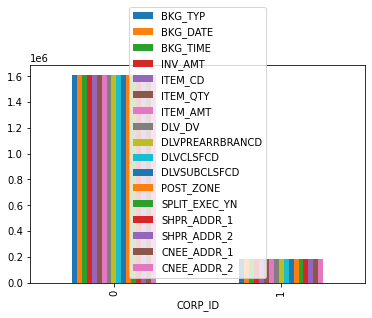

In [119]:
allFC_df_groupby.plot.bar()
plt.show()

In [120]:
allFC_df.groupby('DLVCLSFCD').count()

,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,DLVPREARRBRANCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2,BKG_DATE2,day,DLVC_FC_rate
DLVCLSFCD,,,,,,,,,,,,,,,,,,,,
0J12,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
0J25,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
1M15,8781,8781,8781,8781,8781,8781,8781,8781,8781,8781,8781,8781,8781,8781,8781,8781,8781,8781,8781,0
1M27,17064,17064,17064,17064,17064,17064,17064,17064,17064,17064,17064,17064,17064,17064,17064,17064,17064,17064,17064,0
1M32,6687,6687,6687,6687,6687,6687,6687,6687,6687,6687,6687,6687,6687,6687,6687,6687,6687,6687,6687,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XJ78,453,453,453,453,453,453,453,453,453,453,453,453,453,453,453,453,453,453,453,0
XJ82,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,0
XJ84,2536,2536,2536,2536,2536,2536,2536,2536,2536,2536,2536,2536,2536,2536,2536,2536,2536,2536,2536,0


곤지암 : 1542726   
군포 : 180364
만큼의 상품품목들이 존재.   
이다음에 뭐 해야할 지 결정해야함!

지역별 터미널 코드 넣어놓기

### 2-1) 곤지암, 군포 창고에서 어느 지역으로 얼마나 이동하는지   
- 그냥 pivot 테이블을 쓰는게 맞겠다.   
- 그래서 내가 하고 싶은게 뭐냐면 FC 구분이 row(index)에 두개로 들어가고, column에 수십 혹은 수백개가 될 수도 있는 배달터미널코드를 써서 이 FC에서 각 지역별로 몇개의 상품품목이 들어갔는지를 확인하고 싶음!

### 2-2) 곤지암 FC로부터의 배달터미널코드!

In [50]:
FC0_df = allFC_df[allFC_df['CORP_ID']=='0']

In [51]:
FC0_df_groupby = FC0_df.groupby('DLVCLSFCD').count()
FC0_df_groupby

,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,DLVPREARRBRANCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
DLVCLSFCD,,,,,,,,,,,,,,,,,
1M15,7928,7928,7928,7928,7928,7928,7928,7928,7928,7928,7928,7928,7928,7928,7928,7928,7928
1M27,15329,15329,15329,15329,15329,15329,15329,15329,15329,15329,15329,15329,15329,15329,15329,15329,15329
1M32,6165,6165,6165,6165,6165,6165,6165,6165,6165,6165,6165,6165,6165,6165,6165,6165,6165
1M34,5990,5990,5990,5990,5990,5990,5990,5990,5990,5990,5990,5990,5990,5990,5990,5990,5990
1M36,6298,6298,6298,6298,6298,6298,6298,6298,6298,6298,6298,6298,6298,6298,6298,6298,6298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XJ78,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400
XJ82,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334
XJ84,2265,2265,2265,2265,2265,2265,2265,2265,2265,2265,2265,2265,2265,2265,2265,2265,2265


..좀 보기 별로게 만들어버렸지만 일단 곤지암FC에서 나가는 상품들의 배달터미널코드는 총 323개가 있다. 아래의 데이터는 축약본!

In [52]:
FC0_df['DLVCLSFCD'].value_counts()

4A70    19087
4C40    16033
1M27    15329
4A16    15185
3B47    14511
        ...  
8Z66        2
JJ08        2
9F73        1
9E36        1
9Y01        1
Name: DLVCLSFCD, Length: 324, dtype: int64

### 2-3) 군포 FC로부터의 배달터미널코드!

총 344개의 배달터미널로 상품이 간다! -> 보유하고 있는 상품의 수는 곤지암보다 적지만 더 많은 터미널과 연결되어 있음을 확인할 수 있음!

In [53]:
FC1_df = allFC_df[allFC_df['CORP_ID']=='1']

In [54]:
FC1_df['DLVCLSFCD'].value_counts()

4A70    2183
1M27    1735
4A16    1681
6P47    1616
6R39    1613
        ... 
5F20      20
WV86      17
1R13       3
0J12       1
0J25       1
Name: DLVCLSFCD, Length: 345, dtype: int64

오.. 이렇게 된 이상 배달터미널코드 별로도 한 번 살펴봐야할 것 같은데~~?
### 2-4) 배달 터미널 코드 별 FC 상품량

여기선 데이터에 쓸데없는 값(은 물론 아니지만)의 칼럼은 좀 많이 지우고 남길거만 남겨서 진행해보겠음.

- BKG_DATE : 주문 날짜
- ITEM_CD : 품목 코드

..시각화 하고 싶어서 일단 주문날짜 칼럼도 날려봄!

In [55]:
allFC_df_ext = allFC_df[['CORP_ID','DLVCLSFCD','ITEM_CD']]

In [56]:
allFC_df_ext['CORP_ID'].astype('int')

0         0
1         0
2         0
3         0
4         0
         ..
676907    1
676908    1
676909    1
676910    1
676911    1
Name: CORP_ID, Length: 1786372, dtype: int32

In [57]:
allFC_df_ext['CORP_ID'].dtypes

dtype('O')

위에 애들 진짜 어쩌란건지 모르겠음....뭐가 잘못된거지,, 나 분명 int로 데이터타입 바꾼거 아냐? 이제 물론 의미없게 쓰긴했음;

In [115]:
#피벗 테이블 사용해서 위의 배달터미널코드 별 FC 로 가는 상품들의 갯수를 count 해줬음.
allFC_df_ext_pt = pd.pivot_table(allFC_df_ext,index ='DLVCLSFCD',columns='CORP_ID',aggfunc='count',margins = True)

In [116]:
allFC_df_ext_pt.head(10)

ITEM_CD               
CORP_ID          0       1    All
DLVCLSFCD                        
0J12           NaN     1.0      1
0J25           NaN     1.0      1
1M15        7928.0   853.0   8781
1M27       15329.0  1735.0  17064
1M32        6165.0   522.0   6687
1M34        5990.0   482.0   6472
1M36        6298.0   702.0   7000
1M47       11325.0  1083.0  12408
1M48         545.0   111.0    656
1M70       10613.0   983.0  11596

Transform pivot table to dataframe

In [117]:
allFC_df_ext_pt.reset_index(inplace =True)

In [118]:
allFC_df_ext_pt.head(10)

DLVCLSFCD  ITEM_CD               
CORP_ID                  0       1    All
0            0J12      NaN     1.0      1
1            0J25      NaN     1.0      1
2            1M15   7928.0   853.0   8781
3            1M27  15329.0  1735.0  17064
4            1M32   6165.0   522.0   6687
5            1M34   5990.0   482.0   6472
6            1M36   6298.0   702.0   7000
7            1M47  11325.0  1083.0  12408
8            1M48    545.0   111.0    656
9            1M70  10613.0   983.0  11596

In [111]:
allFC_df['DLVC_FC_rate'] = None

In [ ]:
pd.pivot_table(allFC_df,index=['DLVCLSFCD'],columns=['CORP_ID'],values=['tch_block','cell_drop'],aggfunc = lamdba x:x*100/'cell_name')


In [112]:
for index in allFC_df.index:
    try:
        allFC_df['DLVC_FC_rate'][index]= allFC_df[all/allFC_df[allFC_df['CORP_ID']==0]

SyntaxError: unexpected EOF while parsing (<ipython-input-112-b6dbcd65f111>, line 3)

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

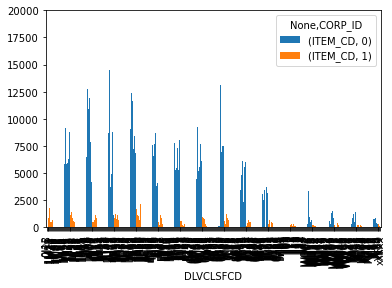

In [104]:
allFC_df_ext_pt.plot.bar()
plt.show()

In [62]:
allFC_df_groupby2 = allFC_df.groupby(['DLVCLSFCD', 'CORP_ID'])
allFC_df_groupby2

In [63]:
allFC_df_groupby2.count()

BKG_TYP  BKG_DATE  BKG_TIME  INV_AMT  ITEM_CD  ITEM_QTY  \
DLVCLSFCD CORP_ID                                                            
0J12      1              1         1         1        1        1         1   
0J25      1              1         1         1        1        1         1   
1M15      0           7928      7928      7928     7928     7928      7928   
          1            853       853       853      853      853       853   
1M27      0          15329     15329     15329    15329    15329     15329   
...                    ...       ...       ...      ...      ...       ...   
XJ84      1            271       271       271      271      271       271   
XK39      0           1379      1379      1379     1379     1379      1379   
          1            156       156       156      156      156       156   
xxxxx     0           1010      1010      1010     1010     1010      1010   
          1             33        33        33       33       33        33   

                   ITEM_AMT  DLV_DV  DLVPREARRBRANCD  DLVSUBCLSFCD  POST_ZONE  \
DLVCLSFCD CORP_ID                                                               
0J12      1               1       1                1             1          1   
0J25      1               1       1                1             1          1   
1M15      0            7928    7928             7928          7928       7928   
          1             853     853              853           853        853   
1M27      0           15329   15329            15329         15329      15329   
...                     ...     ...              ...           ...        ...   
XJ84      1             271     271              271           271        271   
XK39      0            1379    1379             1379          1379       1379   
          1             156     156              156           156        156   
xxxxx     0            1010    1010             1010          1010       1010   
          1              33      33               33            33         33   

                   SPLIT_EXEC_YN  SHPR_ADDR_1  SHPR_ADDR_2  CNEE_ADDR_1  \
DLVCLSFCD CORP_ID                                                         
0J12      1                    1            1            1            1   
0J25      1                    1            1            1            1   
1M15      0                 7928         7928         7928         7928   
          1                  853          853          853          853   
1M27      0                15329        15329        15329        15329   
...                          ...          ...          ...          ...   
XJ84      1                  271          271          271          271   
XK39      0                 1379         1379         1379         1379   
          1                  156          156          156          156   
xxxxx     0                 1010         1010         1010         1010   
          1                   33           33           33           33   

                   CNEE_ADDR_2  
DLVCLSFCD CORP_ID               
0J12      1                  1  
0J25      1                  1  
1M15      0               7928  
          1                853  
1M27      0              15329  
...                        ...  
XJ84      1                271  
XK39      0               1379  
          1                156  
xxxxx     0               1010  
          1                 33  

[669 rows x 16 columns]

In [64]:
"""allFC_df_groupby = allFC_df.groupby('CORP_ID')
for i in allFC_df_groupby:
    print(type(i))
"""

"allFC_df_groupby = allFC_df.groupby('CORP_ID')\nfor i in allFC_df_groupby:\n    print(type(i))\n"

In [65]:
"""allFC_df.groupby('CORP_ID')[['DLVCLSFCD']].agg(['count'])"""

"allFC_df.groupby('CORP_ID')[['DLVCLSFCD']].agg(['count'])"

#  월별 데이터를 정리해본다!

민주가 월 별 품목량 정렬을 해봤는데 같은 품목에 대해서 월 별 수요가 얼마나 들쭉날쭉한지를 확인해본다.

- 품목(이 인덱스가 되어야함) 별 수요에 대해 월 별 정리를 해야하는데,,(월별로만 파악하면 됨!)   
- 그럼그냥 BKG_DATE (주문 날짜가 어차피 수량느낌으로 되어있으니 202103NN으로 되어있는건 3, 이런 새로운 인덱스를 만들자)

In [66]:
allFC_df_DATE1 = allFC_df
allFC_df_DATE1['BKG_DATE2']= pd.to_datetime(allFC_df['BKG_DATE'], format='%Y%m%d')

In [67]:
allFC_df_DATE1['BKG_DATE2']

0        2021-03-03
1        2021-03-03
2        2021-03-03
3        2021-03-03
4        2021-03-03
            ...    
676907   2021-06-28
676908   2021-06-28
676909   2021-06-28
676910   2021-06-28
676911   2021-06-28
Name: BKG_DATE2, Length: 1786372, dtype: datetime64[ns]

datetime 칼럼을 index로 만들기

.index는 대상 DataFrame의 인덱스를 표시하는 함수

In [68]:
print(allFC_df_DATE1.index)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            676902, 676903, 676904, 676905, 676906, 676907, 676908, 676909,
            676910, 676911],
           dtype='int64', length=1786372)


일 별 상품 수요량 칼럼 만들어 주고 그거 대로 

근데 이럴려면 인덱스를 다시 짜야할텐데,,, 흐음

인덱스를 date로 옮겨준 뒤 칼럼을 만들어야할 듯
-> 이거는 FC0_DATE_df.set_index(FC0_DATE_df['BKG_DATE2'], inplace =True) 이걸로 구현이 되긴 함.

In [69]:
allFC_df_DATE1['BKG_DATE2'].count()

1786372

set_index 함수를 써서 datetime 컬럼을 인덱스로 지정.

pandas의 resample 함수 : 일별 데이터를 주별, 월별 데이터로 변환해줌.

이 아래의 친구를 쓰면 안될 것 같기도 한데,,, 주차별로 끊어서 1~16주차 정도까지 상품별로 숫자만 새로운칼럼에 만들어 넣어주자. 그러면 끝일듯? ..오히려 엑ㅅ

아니다. 오히려 그냥 너무 느리니깐 월 별 데이터 묶어놓은거에서 일자별로 만들어서 칼럼을 새로판 뒤 일자별로 정리하고 그걸 for문으로 묶어서 3-9일 10-16, 17-23, 24-30 음... 그다음은 새로 파서 3.31 에서 4월 ,, 일 들로 정리하자..이게 가장 빠르고 현실적인 방법일 듯

In [70]:
# 'W-Mon' : 변경하는 기준을 주 별로 지정, how는 기준 변경에 대한 행위, 
weeklyFC_df = allFC_df_DATE1.resample('W',how={'DLVCLSFCD'.
                                               count()}).fillna(0)

TypeError: count() takes at least 1 argument (0 given)

In [71]:
allFC_df_DATE = allFC_df[['CORP_ID','DLVCLSFCD','ITEM_CD','BKG_DATE']]

In [72]:
allFC_df_DATE

,CORP_ID,DLVCLSFCD,ITEM_CD,BKG_DATE
0,0,5Z73,134265392,20210303
1,0,6R67,4610261043_2,20210303
2,0,9Y25,4936599538_1,20210303
3,0,1N65,3858391637_1,20210303
4,0,3D84,4631307460,20210303
...,...,...,...,...
676907,1,5F20,00281,20210628
676908,1,5F20,00316,20210628
676909,1,5F20,00338,20210628
676910,1,5F20,00183,20210628


In [73]:
allFC_df_DATE_pt = pd.pivot_table(allFC_df_DATE,index ='ITEM_CD',columns='BKG_DATE',aggfunc='count')

In [74]:
allFC_df_DATE_pt

CORP_ID                                                        \
BKG_DATE    20210301 20210302 20210303 20210304 20210305 20210306 20210307   
ITEM_CD                                                                      
0001             NaN      NaN      NaN      NaN      NaN      NaN      NaN   
0003             NaN      NaN      NaN      NaN      NaN      NaN      NaN   
00062            NaN      NaN      NaN      NaN      NaN      NaN      NaN   
00083            NaN      NaN      NaN      NaN      NaN      NaN      NaN   
00085            NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...              ...      ...      ...      ...      ...      ...      ...   
shop0001678      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
shop0001679      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
shop0001680      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
whole800001      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
whole800002      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

                                        ... DLVCLSFCD                    \
BKG_DATE    20210308 20210309 20210310  ...  20210621 20210622 20210623   
ITEM_CD                                 ...                               
0001             NaN      NaN      NaN  ...      19.0     11.0     10.0   
0003             NaN      NaN      NaN  ...       NaN      NaN      NaN   
00062            NaN      NaN      NaN  ...       NaN      NaN      NaN   
00083            NaN      NaN      NaN  ...       NaN      NaN      NaN   
00085            NaN      NaN      NaN  ...       NaN      NaN      NaN   
...              ...      ...      ...  ...       ...      ...      ...   
shop0001678      NaN      NaN      NaN  ...       NaN      NaN      NaN   
shop0001679      NaN      NaN      NaN  ...       NaN      NaN      NaN   
shop0001680      NaN      NaN      NaN  ...       NaN      NaN      NaN   
whole800001      NaN      NaN      NaN  ...      33.0     25.0     30.0   
whole800002      NaN      NaN      NaN  ...      44.0     51.0     31.0   

                                                                            
BKG_DATE    20210624 20210625 20210626 20210627 20210628 20210629 20210630  
ITEM_CD                                                                     
0001            12.0      5.0      6.0     12.0     10.0     10.0     12.0  
0003             NaN      NaN      NaN      NaN      NaN      NaN      NaN  
00062            NaN      NaN      NaN      NaN      1.0      NaN      NaN  
00083            NaN      NaN      NaN      NaN      1.0      NaN      NaN  
00085            NaN      NaN      NaN      NaN      1.0      NaN      NaN  
...              ...      ...      ...      ...      ...      ...      ...  
shop0001678      NaN      NaN      3.0      1.0      1.0      NaN      1.0  
shop0001679      NaN      2.0      2.0      1.0      NaN      3.0      NaN  
shop0001680      NaN      NaN      NaN      1.0      NaN      NaN      1.0  
whole800001     24.0     24.0     16.0     20.0     16.0     24.0     21.0  
whole800002     37.0     22.0     16.0     21.0     33.0     34.0     31.0  

[16951 rows x 244 columns]

In [75]:
allFC_df_DATE_pt0 = allFC_df_DATE_pt.fillna(0)
allFC_df_DATE_pt0

CORP_ID                                                        \
BKG_DATE    20210301 20210302 20210303 20210304 20210305 20210306 20210307   
ITEM_CD                                                                      
0001             0.0      0.0      0.0      0.0      0.0      0.0      0.0   
0003             0.0      0.0      0.0      0.0      0.0      0.0      0.0   
00062            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
00083            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
00085            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...              ...      ...      ...      ...      ...      ...      ...   
shop0001678      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
shop0001679      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
shop0001680      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
whole800001      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
whole800002      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

                                        ... DLVCLSFCD                    \
BKG_DATE    20210308 20210309 20210310  ...  20210621 20210622 20210623   
ITEM_CD                                 ...                               
0001             0.0      0.0      0.0  ...      19.0     11.0     10.0   
0003             0.0      0.0      0.0  ...       0.0      0.0      0.0   
00062            0.0      0.0      0.0  ...       0.0      0.0      0.0   
00083            0.0      0.0      0.0  ...       0.0      0.0      0.0   
00085            0.0      0.0      0.0  ...       0.0      0.0      0.0   
...              ...      ...      ...  ...       ...      ...      ...   
shop0001678      0.0      0.0      0.0  ...       0.0      0.0      0.0   
shop0001679      0.0      0.0      0.0  ...       0.0      0.0      0.0   
shop0001680      0.0      0.0      0.0  ...       0.0      0.0      0.0   
whole800001      0.0      0.0      0.0  ...      33.0     25.0     30.0   
whole800002      0.0      0.0      0.0  ...      44.0     51.0     31.0   

                                                                            
BKG_DATE    20210624 20210625 20210626 20210627 20210628 20210629 20210630  
ITEM_CD                                                                     
0001            12.0      5.0      6.0     12.0     10.0     10.0     12.0  
0003             0.0      0.0      0.0      0.0      0.0      0.0      0.0  
00062            0.0      0.0      0.0      0.0      1.0      0.0      0.0  
00083            0.0      0.0      0.0      0.0      1.0      0.0      0.0  
00085            0.0      0.0      0.0      0.0      1.0      0.0      0.0  
...              ...      ...      ...      ...      ...      ...      ...  
shop0001678      0.0      0.0      3.0      1.0      1.0      0.0      1.0  
shop0001679      0.0      2.0      2.0      1.0      0.0      3.0      0.0  
shop0001680      0.0      0.0      0.0      1.0      0.0      0.0      1.0  
whole800001     24.0     24.0     16.0     20.0     16.0     24.0     21.0  
whole800002     37.0     22.0     16.0     21.0     33.0     34.0     31.0  

[16951 rows x 244 columns]

In [76]:
#월 별로 쪼개기 위해서 pandas의 datetime의 형태로 변환해주는 메서드 사용
allFC_df_DATE['BKG_DATE2']= pd.to_datetime(allFC_df_DATE['BKG_DATE'], format='%Y%m%d')
allFC_df_DATE

<ipython-input-76-441b4423ace4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allFC_df_DATE['BKG_DATE2']= pd.to_datetime(allFC_df_DATE['BKG_DATE'], format='%Y%m%d')


,CORP_ID,DLVCLSFCD,ITEM_CD,BKG_DATE,BKG_DATE2
0,0,5Z73,134265392,20210303,2021-03-03
1,0,6R67,4610261043_2,20210303,2021-03-03
2,0,9Y25,4936599538_1,20210303,2021-03-03
3,0,1N65,3858391637_1,20210303,2021-03-03
4,0,3D84,4631307460,20210303,2021-03-03
...,...,...,...,...,...
676907,1,5F20,00281,20210628,2021-06-28
676908,1,5F20,00316,20210628,2021-06-28
676909,1,5F20,00338,20210628,2021-06-28
676910,1,5F20,00183,20210628,2021-06-28


In [77]:
allFC_df_DATE['BKG_DATE2']

0        2021-03-03
1        2021-03-03
2        2021-03-03
3        2021-03-03
4        2021-03-03
            ...    
676907   2021-06-28
676908   2021-06-28
676909   2021-06-28
676910   2021-06-28
676911   2021-06-28
Name: BKG_DATE2, Length: 1786372, dtype: datetime64[ns]

주문날짜 데이터를 year, month, day로 나누기

In [78]:
allFC_df_DATE['BKG_DATE2'].astype('object')

0         2021-03-03 00:00:00
1         2021-03-03 00:00:00
2         2021-03-03 00:00:00
3         2021-03-03 00:00:00
4         2021-03-03 00:00:00
                 ...         
676907    2021-06-28 00:00:00
676908    2021-06-28 00:00:00
676909    2021-06-28 00:00:00
676910    2021-06-28 00:00:00
676911    2021-06-28 00:00:00
Name: BKG_DATE2, Length: 1786372, dtype: object

월 별로 데이터 끊기 완료!

In [79]:
allFC_df_DATE['month']= allFC_df_DATE['BKG_DATE2'].dt.month
allFC_df_DATE

<ipython-input-79-067f9f8808bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allFC_df_DATE['month']= allFC_df_DATE['BKG_DATE2'].dt.month


,CORP_ID,DLVCLSFCD,ITEM_CD,BKG_DATE,BKG_DATE2,month
0,0,5Z73,134265392,20210303,2021-03-03,3
1,0,6R67,4610261043_2,20210303,2021-03-03,3
2,0,9Y25,4936599538_1,20210303,2021-03-03,3
3,0,1N65,3858391637_1,20210303,2021-03-03,3
4,0,3D84,4631307460,20210303,2021-03-03,3
...,...,...,...,...,...,...
676907,1,5F20,00281,20210628,2021-06-28,6
676908,1,5F20,00316,20210628,2021-06-28,6
676909,1,5F20,00338,20210628,2021-06-28,6
676910,1,5F20,00183,20210628,2021-06-28,6


In [80]:
allFC_df_DATE_pt = pd.pivot_table(allFC_df_DATE,index ='ITEM_CD',columns='month',aggfunc='count')

In [81]:
allFC_df_DATE_pt0 = allFC_df_DATE_pt.fillna(0)
allFC_df_DATE_pt0

BKG_DATE                       BKG_DATE2                        \
month              3      4      5       6         3      4      5       6   
ITEM_CD                                                                      
0001             0.0  210.0  689.0   372.0       0.0  210.0  689.0   372.0   
0003             0.0    0.0    2.0     2.0       0.0    0.0    2.0     2.0   
00062            0.0    0.0    0.0     1.0       0.0    0.0    0.0     1.0   
00083            0.0    0.0    0.0     1.0       0.0    0.0    0.0     1.0   
00085            0.0    0.0    0.0     1.0       0.0    0.0    0.0     1.0   
...              ...    ...    ...     ...       ...    ...    ...     ...   
shop0001678      0.0    0.0    0.0     6.0       0.0    0.0    0.0     6.0   
shop0001679      0.0    0.0    0.0     8.0       0.0    0.0    0.0     8.0   
shop0001680      0.0    0.0    0.0     2.0       0.0    0.0    0.0     2.0   
whole800001      0.0    0.0   33.0   851.0       0.0    0.0   33.0   851.0   
whole800002      0.0    0.0  142.0  1203.0       0.0    0.0  142.0  1203.0   

            CORP_ID                       DLVCLSFCD                        
month             3      4      5       6         3      4      5       6  
ITEM_CD                                                                    
0001            0.0  210.0  689.0   372.0       0.0  210.0  689.0   372.0  
0003            0.0    0.0    2.0     2.0       0.0    0.0    2.0     2.0  
00062           0.0    0.0    0.0     1.0       0.0    0.0    0.0     1.0  
00083           0.0    0.0    0.0     1.0       0.0    0.0    0.0     1.0  
00085           0.0    0.0    0.0     1.0       0.0    0.0    0.0     1.0  
...             ...    ...    ...     ...       ...    ...    ...     ...  
shop0001678     0.0    0.0    0.0     6.0       0.0    0.0    0.0     6.0  
shop0001679     0.0    0.0    0.0     8.0       0.0    0.0    0.0     8.0  
shop0001680     0.0    0.0    0.0     2.0       0.0    0.0    0.0     2.0  
whole800001     0.0    0.0   33.0   851.0       0.0    0.0   33.0   851.0  
whole800002     0.0    0.0  142.0  1203.0       0.0    0.0  142.0  1203.0  

[16951 rows x 16 columns]

### 주 별로 묶어서 데이터 정리하기
*이게 추가된 부분!*

In [97]:
import datetime

In [169]:
allFC_df['week'] = allFC_df['BKG_DATE2'].dt.week

<ipython-input-169-978ffc9858bc>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  allFC_df['week'] = allFC_df['BKG_DATE2'].dt.week


In [170]:
allFC_df['week']

0          9
1          9
2          9
3          9
4          9
          ..
676907    26
676908    26
676909    26
676910    26
676911    26
Name: week, Length: 1786372, dtype: int64

In [167]:
allFC_df['']

0        -503
1        -503
2        -503
3        -503
4        -503
         ... 
676907   -486
676908   -486
676909   -486
676910   -486
676911   -486
Name: day, Length: 1786372, dtype: int64

In [171]:
allFC_df_week = allFC_df.groupby(['week','ITEM_CD'])
allFC_df_week_count = allFC_df_week.size()
allFC_df_week_count

week  ITEM_CD    
9     100026          7
      100028          4
      100032          2
      100033          3
      100034          1
                     ..
26    shop0001678     2
      shop0001679     3
      shop0001680     1
      whole800001    61
      whole800002    98
Length: 100040, dtype: int64

In [173]:
allFC_df_week_df = pd.DataFrame(allFC_df_week_count)
allFC_df_week_df

0
week ITEM_CD        
9    100026        7
     100028        4
     100032        2
     100033        3
     100034        1
...               ..
26   shop0001678   2
     shop0001679   3
     shop0001680   1
     whole800001  61
     whole800002  98

[100040 rows x 1 columns]

In [ ]:
allFC_df_week_df['TERMINAL_CD']= allFC_df['DLVC']

In [158]:
allFC_df_unstack = allFC_df_week_count.unstack(fill_value = 0)
allFC_df_unstack

ITEM_CD,0001,0003,00062,00083,00085,00183,00210413,00224,00241,00263,...,shop0001673,shop0001674,shop0001675,shop0001676,shop0001677,shop0001678,shop0001679,shop0001680,whole800001,whole800002
BKG_DATE2,,,,,,,,,,,,,,,,,,,,,
2021-03-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-03-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-03-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-03-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-03-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,6,0,0,0,0,0,0,0,0,0,...,2,0,1,3,0,3,2,0,16,16
2021-06-27,12,0,0,0,0,0,0,0,0,0,...,0,0,1,3,0,1,1,1,20,21
2021-06-28,10,0,1,1,1,1,0,1,1,1,...,4,0,2,5,1,1,0,0,16,33


In [159]:
allFC_week = allFC_df.groupby(['BKG_DATE2',pd.Grouper(freq='1W')])[Count].count()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [149]:
all_week.set_index('ITEM_CD')

,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_QTY,ITEM_AMT,DLV_DV,DLVPREARRBRANCD,DLVCLSFCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2,day,DLVC_FC_rate
ITEM_CD,,,,,,,,,,,,,,,,,,,
69513,69513,69513,69513,69513,69513,69513,69513,69513,69513,69513,69513,69513,69513,69513,69513,69513,69513,69513,0
51057,51057,51057,51057,51057,51057,51057,51057,51057,51057,51057,51057,51057,51057,51057,51057,51057,51057,51057,0
52863,52863,52863,52863,52863,52863,52863,52863,52863,52863,52863,52863,52863,52863,52863,52863,52863,52863,52863,0
104246,104246,104246,104246,104246,104246,104246,104246,104246,104246,104246,104246,104246,104246,104246,104246,104246,104246,104246,0
69483,69483,69483,69483,69483,69483,69483,69483,69483,69483,69483,69483,69483,69483,69483,69483,69483,69483,69483,0
66502,66502,66502,66502,66502,66502,66502,66502,66502,66502,66502,66502,66502,66502,66502,66502,66502,66502,66502,0
81015,81015,81015,81015,81015,81015,81015,81015,81015,81015,81015,81015,81015,81015,81015,81015,81015,81015,81015,0
109012,109012,109012,109012,109012,109012,109012,109012,109012,109012,109012,109012,109012,109012,109012,109012,109012,109012,109012,0
76293,76293,76293,76293,76293,76293,76293,76293,76293,76293,76293,76293,76293,76293,76293,76293,76293,76293,76293,0


In [106]:
allFC_week_df=pd.DataFrame(all_week)

C:\anan\lib\site-packages\pandas\core\internals\construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


In [109]:
allFC_week_df.describe

<bound method NDFrame.describe of                                                     0
0              CORP_ID  BKG_TYP  BKG_DATE  BKG_TIM...
1              CORP_ID  BKG_TYP  BKG_DATE  BKG_TIM...
2              CORP_ID  BKG_TYP  BKG_DATE  BKG_TIM...
3              CORP_ID  BKG_TYP  BKG_DATE  BKG_TIM...
4              CORP_ID  BKG_TYP  BKG_DATE  BKG_TIM...
5              CORP_ID  BKG_TYP  BKG_DATE  BKG_TIM...
6              CORP_ID  BKG_TYP  BKG_DATE  BKG_TIM...
7              CORP_ID  BKG_TYP  BKG_DATE  BKG_TIM...
8              CORP_ID  BKG_TYP  BKG_DATE  BKG_TIM...
9              CORP_ID  BKG_TYP  BKG_DATE  BKG_TIM...
10             CORP_ID  BKG_TYP  BKG_DATE  BKG_TIM...
11             CORP_ID  BKG_TYP  BKG_DATE  BKG_TIM...
12             CORP_ID  BKG_TYP  BKG_DATE  BKG_TIM...
13             CORP_ID  BKG_TYP  BKG_DATE  BKG_TIM...
14             CORP_ID  BKG_TYP  BKG_DATE  BKG_TIM...
15             CORP_ID  BKG_TYP  BKG_DATE  BKG_TIM...
16             CORP_ID  BKG_TYP  BKG_DATE  BKG_T

### 정리! 


3,4,5,6월의 상품 품목별 수요량 확인 테이블

In [82]:
allFC_df_DATE_month = allFC_df_DATE[['ITEM_CD','month','BKG_DATE']]
allFC_df_DATE_month_pt =  pd.pivot_table(allFC_df_DATE_month,index ='ITEM_CD',columns='month',aggfunc='count')
allFC_df_DATE_month_pt0 = allFC_df_DATE_month_pt.fillna(0)
allFC_df_DATE_month_pt0

BKG_DATE                      
month              3      4      5       6
ITEM_CD                                   
0001             0.0  210.0  689.0   372.0
0003             0.0    0.0    2.0     2.0
00062            0.0    0.0    0.0     1.0
00083            0.0    0.0    0.0     1.0
00085            0.0    0.0    0.0     1.0
...              ...    ...    ...     ...
shop0001678      0.0    0.0    0.0     6.0
shop0001679      0.0    0.0    0.0     8.0
shop0001680      0.0    0.0    0.0     2.0
whole800001      0.0    0.0   33.0   851.0
whole800002      0.0    0.0  142.0  1203.0

[16951 rows x 4 columns]

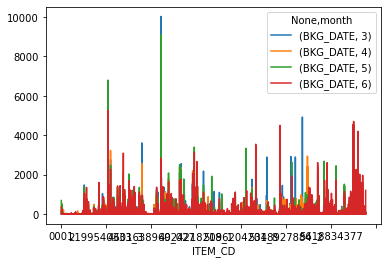

In [83]:
allFC_df_DATE_month_pt0.plot()
plt.show()

month별 상품 수요량 count 해서 딕셔너리로 반환

In [84]:
month_count={}
for i in range(3,7):
    month_count[i]=allFC_df_DATE_month['ITEM_CD'][allFC_df_DATE_month['month']==i].count()
month_count

{3: 309352, 4: 349588, 5: 450521, 6: 676911}

In [85]:
month_count_df = pd.DataFrame(month_count,index=[0])
month_count_df

,3,4,5,6
0,309352,349588,450521,676911


In [86]:
"""sns.countplot(x='month',hue ='ITEM_CD',data=allFC_df_DATE)"""

"sns.countplot(x='month',hue ='ITEM_CD',data=allFC_df_DATE)"

아래거는 굳이 안해도 되지만 걍 리스트 형태로 반환한 month별 상품 품목수 count

In [87]:
month_count=[]
for i in range(3,7):
    month_count.append(allFC_df_DATE_month[allFC_df_DATE_month['month']==i].count())
month_count

[ITEM_CD     309352
 month       309352
 BKG_DATE    309352
 dtype: int64,
 ITEM_CD     349588
 month       349588
 BKG_DATE    349588
 dtype: int64,
 ITEM_CD     450521
 month       450521
 BKG_DATE    450521
 dtype: int64,
 ITEM_CD     676911
 month       676911
 BKG_DATE    676911
 dtype: int64]

### 월 별 데이터 주 별로 나눠서!
BKG_DATE2: datetime object임.

FC0_df :곤지암 FC 의 데이터

In [88]:
FC0_DATE_df=FC0_df
FC0_DATE_df['BKG_DATE2']= pd.to_datetime(FC0_df['BKG_DATE'], format='%Y%m%d')

<ipython-input-88-1181284dffa9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FC0_DATE_df['BKG_DATE2']= pd.to_datetime(FC0_df['BKG_DATE'], format='%Y%m%d')


In [89]:
FC0_DATE_df

,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,DLVPREARRBRANCD,DLVCLSFCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2,BKG_DATE2
0,0,7,20210303,35510,22400.0,134265392,1,14900.0,1.0,7484,5Z73,1,3.0,N,세종특별자치시,S,서울특별시,서대문구,2021-03-03
1,0,7,20210303,35521,20900.0,4610261043_2,1,20900.0,1.0,6427,6R67,4,50.0,N,경기도,광주시,경상남도,김해시,2021-03-03
2,0,7,20210303,35513,37900.0,4936599538_1,1,37900.0,1.0,6158,9Y25,0,53.0,N,경기도,광주시,경상남도,거제시,2021-03-03
3,0,7,20210303,35608,69800.0,3858391637_1,1,69800.0,1.0,8909,1N65,1,6.0,N,경기도,광주시,서울특별시,서초구,2021-03-03
4,0,7,20210303,35551,73700.0,4631307460,1,39800.0,1.0,2777,3D84,1,10.0,N,경기도,광주시,경기도,김포시,2021-03-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676885,0,7,20210629,122812,16900.0,5002901762_12,1,16900.0,1.0,4630,4A16,1,16.0,N,경기도,광주시,경기도,수원시,2021-06-29
676886,0,7,20210630,256,138000.0,5410093340,1,138000.0,1.0,3947,9Z20,3,63.0,N,경기도,광주시,제주특별자치도,제주시,2021-06-30
676887,0,7,20210630,143118,13900.0,5582399098,1,13900.0,1.0,7611,2I44,1m,34.0,N,경기도,광주시,대전광역시,유성구,2021-06-30
676892,0,7,20210629,223503,125800.0,5525868431,2,125800.0,1.0,2516,6N09,2j,48.0,N,경기도,광주시,부산광역시,해운대구,2021-06-29


In [ ]:
"""FC0_DATE_df.set_index(FC0_DATE_df['BKG_DATE2'], inplace =True)"""
#이건 그냥 인덱스를 날짜로 정리하는 거

In [ ]:
#FC0_DATE_df.head(10)

In [ ]:
weekly_FC0_df

In [93]:
FC0_DATE_df['BKG_DATE']

0         20210303
1         20210303
2         20210303
3         20210303
4         20210303
            ...   
676885    20210629
676886    20210630
676887    20210630
676892    20210629
676893    20210630
Name: BKG_DATE, Length: 1606008, dtype: int64

In [94]:
FC0_DATE_df['BKG_DATE'].astype('object')

0         20210303
1         20210303
2         20210303
3         20210303
4         20210303
            ...   
676885    20210629
676886    20210630
676887    20210630
676892    20210629
676893    20210630
Name: BKG_DATE, Length: 1606008, dtype: object

In [96]:
month =[]
day = []
for data in FC0_DATE_df['BKG_DATE']:
    day.append(FC0_DATE_df['BKG_DATE'][6:])


In [ ]:
month = []
for data in FC0_DATE_df['BKG_DATE2']:
    day.append(str(FC0_DATE_df).split('-')[1])

## Content 2 상품 품목 하나만 떼어내서 기간 별로 수요량 확인하기
음 잠깐만 이걸 하기전에 그냥 월을 주 단위로 끊어가지고 상품 수요량 확인해보는게 더 좋을듯 싶은데

In [ ]:
one_FC1_df = FC0_df[FC0_df['ITEM_CD']=='0001']
